#**Importing Libraries and Dataset**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='white', rc={'figure.figsize':(20,10)})

from sklearn.linear_model import LogisticRegression # linear model for classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split # split dataset
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
#from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [56]:
# Read Data
data=pd.read_csv("census.csv", index_col=0)
#data=pd.read_csv("census.csv")        for jupyter notebook
data

,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
age,,,,,,,,,,,,,
39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,Private,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
39,Private,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K
38,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K


# **Look at the Data**

In [57]:
data.head()

,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
age,,,,,,,,,,,,,
39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [58]:
data.shape

(45222, 13)

In [59]:
data.columns

Index(['workclass', 'education_level', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 39 to 35
Data columns (total 13 columns):
workclass          45222 non-null object
education_level    45222 non-null object
education-num      45222 non-null float64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
sex                45222 non-null object
capital-gain       45222 non-null float64
capital-loss       45222 non-null float64
hours-per-week     45222 non-null float64
native-country     45222 non-null object
income             45222 non-null object
dtypes: float64(4), object(9)
memory usage: 4.8+ MB


In [61]:
data.describe()

,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000
mean,10.118460,1101.430344,88.595418,40.938017
std,2.552881,7506.430084,404.956092,12.007508
min,1.000000,0.000000,0.000000,1.000000
25%,9.000000,0.000000,0.000000,40.000000
50%,10.000000,0.000000,0.000000,40.000000
75%,13.000000,0.000000,0.000000,45.000000
max,16.000000,99999.000000,4356.000000,99.000000


# **Profiling**

In [9]:
!pip install pandas_profiling

In [0]:
import pandas_profiling as pp

In [11]:
report=pp.ProfileReport(data)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [0]:
report.to_file('data_assessment.html')


# **Cleaning of Data**


In [0]:
# change to cat
# data['workclass']=data['workclass'].astype('category')
# data['education_level']=data['education_level'].astype('category')
# data['marital-status']=data['marital-status'].astype('category')
# data['occupation']=data['occupation'].astype('category')
# data['relationship']=data['relationship'].astype('category')
# data['race']=data['race'].astype('category')
# data['sex']=data['sex'].astype('category')
# data['native-country']=data['native-country'].astype('category')
# data['income']=data['income'].astype('category')

## Label Encoder

In [0]:
# Categorical boolean mask
categorical_feature_mask = data.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = data.columns[categorical_feature_mask].tolist()

In [0]:
le = LabelEncoder()

In [64]:
# apply le on categorical feature columns
data[categorical_cols] = data[categorical_cols].apply(lambda col: le.fit_transform(col))
data[categorical_cols].head(10)

,workclass,education_level,marital-status,occupation,relationship,race,sex,native-country,income
age,,,,,,,,,
39,5,9,4,0,1,4,1,38,0
50,4,9,2,3,0,4,1,38,0
38,2,11,0,5,1,4,1,38,0
53,2,1,2,5,0,2,1,38,0
28,2,9,2,9,5,2,0,4,0
37,2,12,2,3,5,4,0,38,0
49,2,6,3,7,1,2,0,22,0
52,4,11,2,3,0,4,1,38,1
31,2,12,4,9,1,4,0,38,1


In [65]:
data[categorical_cols].shape

(45222, 9)

xxxxxxxFeature Scaling

In [0]:
f_column=['education-num','capital-gain','capital-loss','hours-per-week']
n_data=data[f_column]

In [67]:
data[f_column].shape

(45222, 4)

In [0]:
# #Instantiate Standard Scaler
# scaler=StandardScaler()
# scaler.fit(data[f_column])

# #Transform Original Data to Zero mean and unit variance
# transformed_data=scaler.transform(data[f_column])

# #Convert to original data frame schema
# data[f_column]=pd.DataFrame(transformed_data,columns=data[f_column].columns)

In [68]:
data[f_column].shape

(45222, 4)

In [69]:
data[f_column].head()


,education-num,capital-gain,capital-loss,hours-per-week
age,,,,
39,13.0,2174.0,0.0,40.0
50,13.0,0.0,0.0,13.0
38,9.0,0.0,0.0,40.0
53,7.0,0.0,0.0,40.0
28,13.0,0.0,0.0,40.0


Concatenate numerical and categorical columns

In [0]:
new_data=pd.concat([data[f_column],data[categorical_cols]],axis=1)

In [71]:
new_data.head()

,education-num,capital-gain,capital-loss,hours-per-week,workclass,education_level,marital-status,occupation,relationship,race,sex,native-country,income
age,,,,,,,,,,,,,
39,13.0,2174.0,0.0,40.0,5,9,4,0,1,4,1,38,0
50,13.0,0.0,0.0,13.0,4,9,2,3,0,4,1,38,0
38,9.0,0.0,0.0,40.0,2,11,0,5,1,4,1,38,0
53,7.0,0.0,0.0,40.0,2,1,2,5,0,2,1,38,0
28,13.0,0.0,0.0,40.0,2,9,2,9,5,2,0,4,0


In [72]:
new_data.shape

(45222, 13)

# **Look at the Cleaned Data**

In [0]:
#new_data.head()

In [0]:
#new_data.shape

In [0]:
#new_data.columns

In [0]:
#new_data.info()

# **Correlation of features to each other**

In [73]:
correlation_coefficients = new_data.corr()
correlation_coefficients

,education-num,capital-gain,capital-loss,hours-per-week,workclass,education_level,marital-status,occupation,relationship,race,sex,native-country,income
education-num,1.000000,0.126907,0.081711,0.146206,0.040779,0.347444,-0.064986,0.089686,-0.088431,0.031655,0.003417,0.092994,0.332800
capital-gain,0.126907,1.000000,-0.032102,0.083880,0.034543,0.029889,-0.042399,0.019435,-0.056818,0.014078,0.047444,0.007643,0.221034
capital-loss,0.081711,-0.032102,1.000000,0.054195,0.008233,0.016877,-0.034820,0.015267,-0.058425,0.020955,0.046457,0.005955,0.148687
hours-per-week,0.146206,0.083880,0.054195,1.000000,0.051366,0.060887,-0.183178,0.016160,-0.259194,0.044738,0.231425,0.007554,0.227199
workclass,0.040779,0.034543,0.008233,0.051366,1.000000,0.017846,-0.033221,0.017508,-0.065049,0.049765,0.069638,0.003889,0.015659
education_level,0.347444,0.029889,0.016877,0.060887,0.017846,1.000000,-0.041520,-0.033499,-0.013179,0.011457,-0.027569,0.077893,0.081196
marital-status,-0.064986,-0.042399,-0.034820,-0.183178,-0.033221,-0.041520,1.000000,0.016399,0.180436,-0.070302,-0.120008,-0.022721,-0.192711
occupation,0.089686,0.019435,0.015267,0.016160,0.017508,-0.033499,0.016399,1.000000,-0.051644,-0.000026,0.056625,-0.002848,0.049787
relationship,-0.088431,-0.056818,-0.058425,-0.259194,-0.065049,-0.013179,0.180436,-0.051644,1.000000,-0.118584,-0.582974,-0.007144,-0.253402
race,0.031655,0.014078,0.020955,0.044738,0.049765,0.011457,-0.070302,-0.000026,-0.118584,1.000000,0.088935,0.124342,0.070844


In [74]:
sns.heatmap(correlation_coefficients,annot=True,cmap="Blues")

In [0]:
# List of strongly correlated features to income
new_data.corr().sort_values('income', ascending=False)['income'].plot(kind='barh')
plt.gca().invert_yaxis()

# **Feature Selection and Train Test Split**

In [0]:
# write list of features we want to use
features = ['workclass','education_level','marital-status','occupation','relationship','race','sex','native-country','education-num','capital-gain','capital-loss','hours-per-week'] 

# Set X
X= new_data[features]


In [0]:
# Set y
y = new_data["income"]

In [78]:
X.shape


(45222, 12)

In [79]:
y.shape

(45222,)

In [80]:
new_X =  SelectKBest(chi2,k=12).fit_transform(X,y)
X.shape

(45222, 12)

In [81]:
new_X.shape

(45222, 12)

In [0]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size = 0.4, random_state = 42)

# **Predictive Analytics**

> Train a model that predicts if the person clicked on the ad or not.



### **Logistic Regression**  

In [83]:
# initialize model
log_reg = LogisticRegression()

# fit model
log_reg.fit(X_train, y_train)

# predictions
y_pred = log_reg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### **Metrics**

##### Accuracy

In [0]:
# metrics (accuracy)
acc = log_reg.score(X_test, y_test)

In [85]:
# accuracy
acc

0.8214937254685167

##### Confusion Matrix

In [86]:
#Confusion matrix
cf = confusion_matrix(y_test, y_pred)
cf

array([[12895,   741],
       [ 2488,  1965]])

In [87]:
## graph confusion matrix
sns.heatmap(cf, annot = True)
plt.ylabel('Predicted classes')
plt.xlabel('Actual classes')

Text(0.5, 31.4861111111111, 'Actual classes')

##### Precision

In [88]:
log_precision=precision_score(y_test, y_pred)
log_precision

0.7261640798226164

##### Recall

In [89]:
log_recall=recall_score(y_test, y_pred)
log_recall

0.4412755445766899

##### ROC

In [0]:
y_pred_proba=log_reg.predict_proba(X_test)[::,1]
fpr,tpr, _ =roc_curve(y_test, y_pred_proba)
auc=roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc"+str(auc))
plt.legend(loc=4)
plt.show()

In [0]:
fpr,tpr,_=roc_curve(y_test, y_pred_proba)


In [95]:
# log_classificationreport=classification_report(y_test, y_pred)
# log_classificationreport

'              precision    recall  f1-score   support\n\n           0       0.84      0.95      0.89     13636\n           1       0.73      0.44      0.55      4453\n\n    accuracy                           0.82     18089\n   macro avg       0.78      0.69      0.72     18089\nweighted avg       0.81      0.82      0.81     18089\n'

## **RandomForest**

In [0]:
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, Y)

## **XGBOOST**

In [0]:
# initialize model
xgb = XGBClassifier()

# fit model
xgb.fit(X_train, y_train)

# predictions
y_pred = xgb.predict(X_test)

##### Accuracy

In [0]:
acc_xgb=xgb.score(X_test, y_test)

In [0]:
acc_xgb

0.8604676875449168

##### Confusion Matrix

In [0]:
#Confusion matrix
cf_xgb = confusion_matrix(y_test, y_pred)
cf_xgb

array([[12974,   662],
       [ 1862,  2591]])

Text(0.5, 66.5, 'Actual classes')

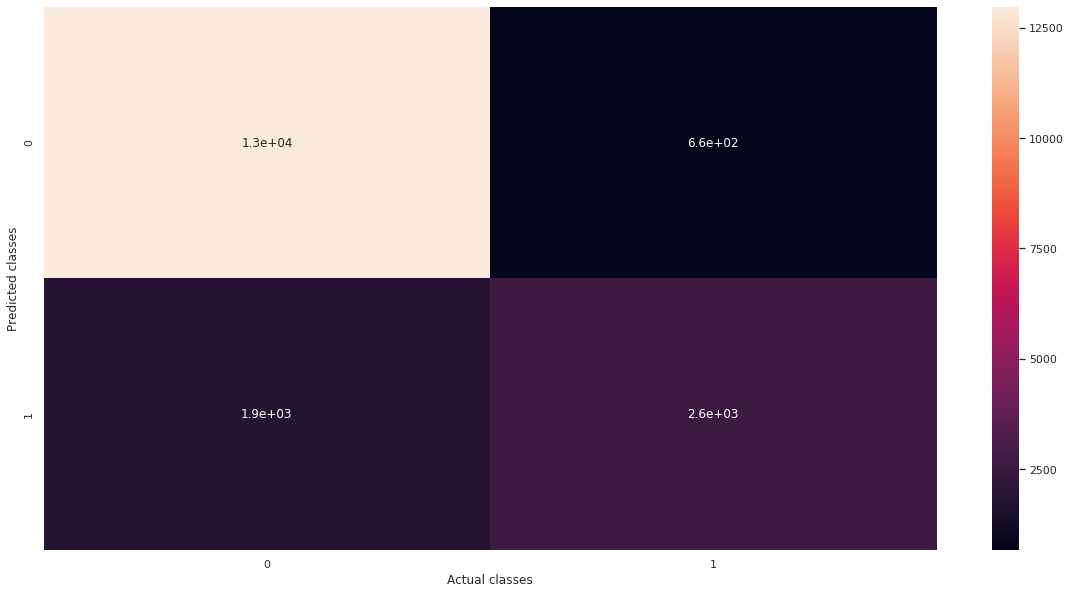

In [0]:
## graph confusion matrix
sns.heatmap(cf_xgb, annot = True)
plt.ylabel('Predicted classes')
plt.xlabel('Actual classes')

##### Precision

In [0]:
xgb_precision=precision_score(y_test, y_pred)
xgb_precision

0.7964955425760836

##### Recall

In [0]:
xgb_recall=recall_score(y_test, y_pred)
xgb_recall

0.5818549292611722

##### ROC

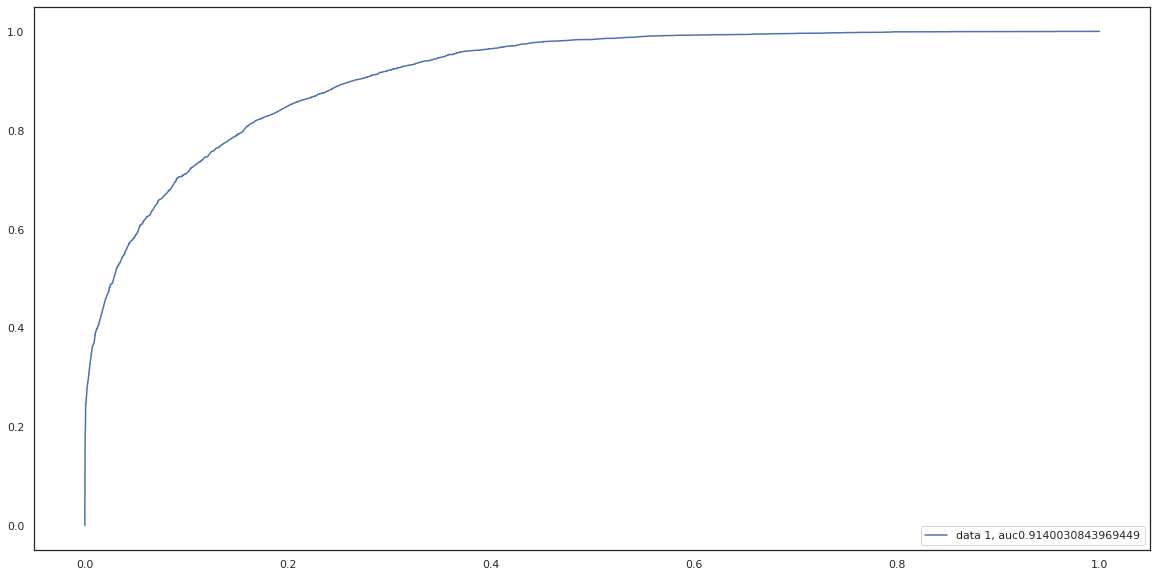

In [0]:
y_pred_proba=xgb.predict_proba(X_test)[::,1]
fpr,tpr, _ =roc_curve(y_test, y_pred_proba)
auc=roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc"+str(auc))
plt.legend(loc=4)
plt.show()